In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO
import numpy as np
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO
import numpy as np

exo_dict = jdi.load_exo_dict()
exo_dict['observation']['sat_level'] = 80    #saturation level in percent of full well 
exo_dict['observation']['sat_unit'] = '%' 
exo_dict['observation']['noccultations'] = 2 #number of transits 
                                             #without having to redo the calcualtion
exo_dict['observation']['baseline'] = 1.0    #fraction of time in transit versus out = in/out
exo_dict['observation']['baseline_unit'] = 'frac' 
exo_dict['observation']['noise_floor'] = 0   #this can be a fixed level or it can be a filepath 
exo_dict['star']['type'] = 'phoenix'        #phoenix or user (if you have your own)
exo_dict['star']['mag'] = 8.0               #magnitude of the system
exo_dict['star']['ref_wave'] = 1.25         #For J mag = 1.25, H = 1.6, K =2.22.. etc (all in micron)
exo_dict['star']['temp'] = 5500             #in K 
exo_dict['star']['metal'] = 0.0             # as log Fe/H
exo_dict['star']['logg'] = 4.0
exo_dict['star']['radius'] = 1
exo_dict['star']['r_unit'] = 'R_sun'    
exo_dict['planet']['type'] = 'constant'
exo_dict['planet']['radius'] = 1                      #other options include "um","nm" ,"Angs", "secs" (for phase curves)
exo_dict['planet']['r_unit'] = 'R_jup'  
exo_dict['planet']['transit_duration'] = 2.0*60.0*60.0 
exo_dict['planet']['td_unit'] = 's'
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'

inst_dict = jdi.load_mode_dict('NIRSpec G395H')
print(inst_dict['configuration']['detector'])
print('Starting TEST run')
result20 = jdi.run_pandexo(exo_dict, ['NIRSpec G395H'], save_file=False)


inst_name  = list(result20.keys())[3]
data = result20[inst_name]
data2 = data['input']['configuration']['detector']['nint']
print('Result keys:', list(result20.keys())) 
print('Data keys:', list(data.keys()))
print(data2)
# print('Wavelength (micron):', data['wave'])
# print('Transit Depth (ppm):', data['spectrum'])
# print('Error (ppm):', data['spectrum_w_rand'])

{'readout_pattern': 'nrsrapid', 'subarray': 'sub2048', 'readmode': 'nrsrapid', 'ngroup': 'optimize', 'nint': 1, 'nexp': 10}
Starting TEST run
Running Single Case for: NIRSpec G395H
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit
Result keys: ['OriginalInput', 'RawData', 'FinalSpectrum', 'PandeiaOutTrans', 'timing', 'warning', 'input', 'timing_div', 'input_div', 'warnings_div']
Data keys: ['sub_reports', 'input', '1d', '2d', 'scalar', 'information', 'transform', 'warnings', 'web_report']
998


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO
import numpy as np
import os
import pandexo.engine.justplotit as jpi 
import pickle as pk

exo_dict = jdi.load_exo_dict()

exo_dict['star']['type'] = 'phoenix'      
exo_dict['star']['temp'] = 3101 
exo_dict['star']['metal'] =   0.24             ## as log Fe/H
exo_dict['star']['logg'] =  5.0286            ## log gravity cgs
exo_dict['star']['mag'] = 9.75
exo_dict['star']['ref_wave'] = 1.25        #For J mag = 1.25, H = 1.6, K =2.22.. etc (all in micron) 
exo_dict['star']['radius'] = 0.2162
exo_dict['star']['r_unit'] = 'R_sun'
exo_dict['planet']['radius'] = 0.24382235
exo_dict['planet']['r_unit'] = 'R_jup'     ## or R_earth

exo_dict['planet']['transit_duration'] = 0.036235833333333335
exo_dict['planet']['td_unit'] = 'd'

exo_dict['planet']['type'] = 'user'  ## 'constant', 'user'
exo_dict['planet']['exopath'] = 'planet_spectrum.txt'
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'
exo_dict['planet']['w_unit'] = 'um' # wavelength unit for user defined spectra

exo_dict['observation']['baseline'] = 1.0 
exo_dict['observation']['baseline_unit'] = 'frac'
exo_dict['observation']['noccultations'] = 1         ## number of transits (changed to match num_tran=10 in plot)
exo_dict['observation']['sat_level'] = 100    #saturation level in percent of full well 
exo_dict['observation']['sat_unit'] = '%' 
exo_dict['observation']['noise_floor'] = 0

print('Starting MULTI INSTRUMENT TEST run')
result = jdi.run_pandexo(exo_dict, ['NIRSpec G140M', 'NIRSpec G235M', 'NIRSpec G395M'], save_file=True, output_file='multirunMedium.p')
result2 = jdi.run_pandexo(exo_dict, ['NIRSpec G140H', 'NIRSpec G235H', 'NIRSpec G395H'], save_file=True, output_file='multirunHigh.p')
print('SUCCESS - MULTI INSTRUMENT RUN COMPLETE')
print(result)

Starting MULTI INSTRUMENT TEST run
Running select instruments


/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/config.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/config.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/config.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal 

Running select instruments


/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/config.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/config.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/sahil/Group-Studies---Exoplanets/.venv/lib/python3.10/site-packages/pandeia/engine/report.py:683: RuntimeWarning: divide by zero encountered in divide
  sn = self.extracted['extracted_flux'] / self.extracted['extracted_noise']
/Users/sahil/Group-Studies---E

SUCCESS - MULTI INSTRUMENT RUN COMPLETE
[{'NIRSpec G140M': {'OriginalInput': {'model_spec': array([0.01499005, 0.0149905 , 0.01501971, 0.01501059, 0.01503487,
       0.01502057, 0.01506313, 0.01500361, 0.01501775, 0.01504418,
       0.01504823, 0.01503932, 0.01505442, 0.01505742, 0.0150602 ,
       0.01504754, 0.01507034, 0.01507059, 0.01507138, 0.0150648 ,
       0.0150563 , 0.0150714 , 0.01507027, 0.01507141, 0.01506046,
       0.01507141, 0.01506707, 0.0150668 , 0.01507101, 0.0150714 ,
       0.01507141, 0.01506729, 0.01507141, 0.01507141, 0.01507141,
       0.01507134, 0.01507141, 0.01507141, 0.0150713 , 0.01507141,
       0.01507141, 0.01507141, 0.01507141, 0.01507141, 0.01507124,
       0.01506415, 0.01506977, 0.01507003, 0.01506633, 0.01506825,
       0.01507141, 0.01507141, 0.01507141, 0.01507141, 0.01507141,
       0.01507122, 0.01507141, 0.01507141, 0.01507141, 0.01507141,
       0.01507139, 0.01507141, 0.01507141, 0.01507141, 0.01507141,
       0.01507141, 0.01507141, 0.0150

In [3]:
# 1. Create the data list AND a name list
data_list = []

for entry in result:
    # Get the key (Instrument Name)
    inst_name = list(entry.keys())[0]
    
    # Only add if the run succeeded
    if 'FinalSpectrum' in entry[inst_name]:
        data_list.append(entry[inst_name])

data_list2 = []

for entry in result2:
    # Get the key (Instrument Name)
    inst_name = list(entry.keys())[0]
    
    # Only add if the run succeeded
    if 'FinalSpectrum' in entry[inst_name]:
        data_list2.append(entry[inst_name])


# x_range is optional, use it if you want to zoom in on a specific area (e.g. 2 to 5 microns)
jpi.jwst_1d_spec(data_list, R=100, model=False, title='Multi-Instrument Comparison', x_range=[1.6, 5.0])
jpi.jwst_1d_spec(data_list2, R=100, model=False, title='Multi-Instrument Comparison High Res', x_range=[1.6, 5.0])

Loading BokehJS ...

Loading BokehJS ...

([array([0.97498408, 0.97990081, 0.98493669, 0.98997177, 0.99500608,
         1.00003948, 1.00519197, 1.01022376, 1.01525475, 1.02028494,
         1.02543395, 1.03070184, 1.03596875, 1.04123475, 1.04649975,
         1.05188342, 1.05714647, 1.06240855, 1.06766964, 1.07304925,
         1.07854733, 1.08404432, 1.08954018, 1.09515434, 1.10064793,
         1.10614037, 1.11163169, 1.11724111, 1.12296868, 1.12869497,
         1.13441993, 1.14026285, 1.14598519, 1.15170624, 1.15742594,
         1.16326337, 1.16921855, 1.17517221, 1.18112445, 1.18719411,
         1.19314332, 1.19909095, 1.20503708, 1.21110047, 1.21728109,
         1.22346006, 1.22975603, 1.23593158, 1.24210539, 1.24827748,
         1.25456642, 1.26097217, 1.267376  , 1.27377789, 1.28029631,
         1.28669424, 1.29309019, 1.29960247, 1.30623109, 1.31285751,
         1.3196    , 1.326222  , 1.33284179, 1.33945931, 1.34619265,
         1.35304173, 1.35988834, 1.3668504 , 1.37369198, 1.380531  ,
         1.38748532, 1.39455477, 1

The mean molecular weight is: 4.877216515255627


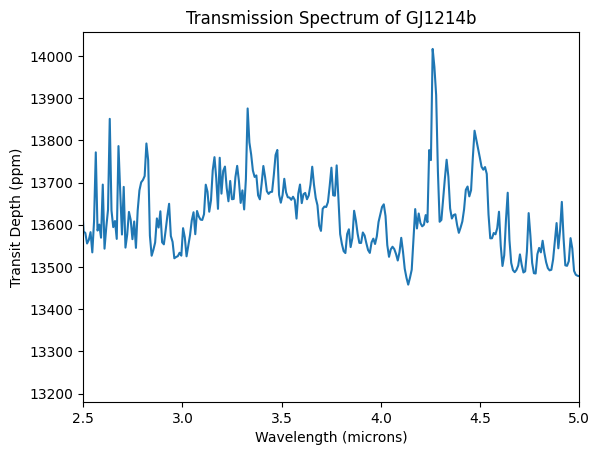

Left Trough Value: 0.013458
Right Trough Value: 0.013485
Peak Value: 0.014016
Running Single Case for: NIRSpec G395H
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit


Loading BokehJS ...

The mean molecular weight is: 4.877216515255627


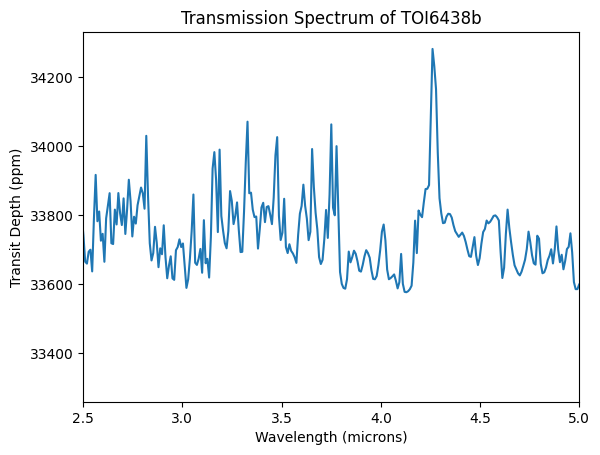

Left Trough Value: 0.033577
Right Trough Value: 0.033618
Peak Value: 0.034282
Running Single Case for: NIRSpec G395H
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit


Loading BokehJS ...

In [42]:
import numpy as np
import scipy.constants as sc
from scipy.interpolate import RegularGridInterpolator
import astropy.constants as const
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO
import numpy as np
import pandexo.engine.justplotit as jpi 
import pickle as pk

with open("/Users/sahil/Group-Studies---Exoplanets/Group 1 Spectrum Code/PlanetaryParameters.csv", newline="") as PlanetaryParametersFile:
	reader = csv.reader(PlanetaryParametersFile)
	header = next(reader)
	data = []
	planetNames = []
	for row in reader:
		row = [item.strip() for item in row]
		if len(row) == 0:
			continue
		*nums, name = row
		conv = [float(item) if item != "" else np.nan for item in nums]
		data.append(conv)
		planetNames.append(name)
	planetaryParameters = np.array(data, dtype=float)

# This section reads the PandExoParameters.csv file and extracts parameters
with open("/Users/sahil/Group-Studies---Exoplanets/Group 1 JWST Code/PandExoParameters.csv", newline="") as PandExoParametersFile:
	reader = csv.reader(PandExoParametersFile)
	header = next(reader)
	data = []
	planetNames = []
	for row in reader:
		row = [item.strip() for item in row]
		if len(row) == 0:
			continue
		*nums, name = row
		conv = [float(item) if item != "" else np.nan for item in nums]
		data.append(conv)
		planetNames.append(name)
	PandExoParameters = np.array(data, dtype=float)



rowCount=0
while rowCount < len(planetaryParameters):
	Rp = planetaryParameters[rowCount][0]  # Planet radius in units of Earth radii
	Mp = planetaryParameters[rowCount][1]  # Planet mass in units of Earth masses
	Tp = planetaryParameters[rowCount][2]  # Planet temperature in K
	mu = planetaryParameters[rowCount][3]  # Mean molecular weight in atomic mass units
	Pcloud = planetaryParameters[rowCount][4]  # Pressure at top of cloud deck in bar
	Pref = planetaryParameters[rowCount][5]   # Reference pressure in bar
	Rs = planetaryParameters[rowCount][6]  # Stellar radius in units of Solar radii     
	PName = planetNames[rowCount]  # Planet name (string)   
	Rp *= const.R_earth.value   # Convert Rp from units of R_Earth to m
	Rs *= const.R_sun.value     # Convert Rs from units of R_Sun to m
	Pcloud *= 1.0e5             # Convert Pcloud from bar to Pa
	Pref *= 1.0e5               # Convert Pref from bar to Pa
	mu *= sc.u                  # Convert mu from atomic mass units to kg
	#print(f"Processing planet with {header[0]}={Rp}, {header[1]}={Mp}, {header[2]}={Tp}, {header[3]}={mu}, {header[4]}={Pcloud}, {header[5]}={Pref}, {header[6]}={Rs}")
	#print(rowCount,len(planetaryParameters))
	

	P = np.logspace(2.0,-9,100) * 1.0e5
	T = Tp*np.ones_like(P)
	n = P/(sc.k*T)
	rho = mu*n
	gp = (sc.G * Mp * const.M_earth.value) / (Rp)**2
	r = np.zeros_like(P)
	g = np.zeros_like(P)
	i_Rp = np.argmin(np.abs(P-Pref))
	r[i_Rp] = Rp
	g[i_Rp] = gp

	for i in range(i_Rp + 1, len(P)):
		g[i] = g[i_Rp] * r[i_Rp] * r[i_Rp] / (r[i-1] * r[i-1])
		r[i] = r[i-1] - ( sc.k * 0.5 * (T[i-1]+T[i]) / (mu * g[i]) ) * np.log(P[i]/P[i-1]) 

	for i in range(i_Rp-1, -1, -1):
		g[i] = g[i_Rp] * r[i_Rp] * r[i_Rp] / (r[i+1] * r[i+1])
		r[i] = r[i+1] - ( sc.k * 0.5 * (T[i+1]+T[i]) / (mu * g[i]) ) * np.log(P[i]/P[i+1])
	# First, set up a dictionary which will contain all the log mixing ratios, and input the abundances of all molecules except H2 and He
	logX = dict()
	logX['h2o'] = -1.1 #fixed compositions
	logX['ch4'] = -1.74
	logX['co'] = -2.0
	logX['co2'] = -1.7
	#logX['nh3'] = -3.0

	# We'll also need to know the mean molecular weights of each molecule (here in units of amu)
	mmw = dict()
	mmw['h2o'] = 18.0
	mmw['ch4'] = 16.0
	mmw['co'] = 28.0
	mmw['co2'] = 44.0
	mmw['h2'] = 2.0
	mmw['he'] = 4.0
	
	# Now we can 'fill' the rest of the atmosphere with H2 and He, which are typically the most abudnant background gases.
	# Let's assume that the ratio of H2 to He is the same as that in the Sun, i.e. X_He/X_H2 = 0.17 (Asplund et al. 2009 shows that X_He/X_H = 0.085, and going from H to H2 means doubling that)
	# Then X_H2 + X_He = 1 - X_rest

	X_rest = np.sum([np.power(10.0,logX[key]) for key in logX.keys()])
	X_H2 = (1.0 - X_rest) / (1.0 + 0.17)
	X_He = 0.17 * X_H2

	# Now let's add H2 and He to the logX dictionary

	logX['h2'] = np.log10(X_H2)
	logX['he'] = np.log10(X_He)

	# With all the mixing ratios defined, we can calculate the mean molecular weight of the atmosphere, mu:
	mu = 0.0
	for mol in logX.keys():
		mu += np.power(10.0,logX[mol])*mmw[mol]

	print("The mean molecular weight is:", mu)

	xsec_dict = dict()
	lam_dict = dict()
	P_dict = dict()
	T_dict = dict()

	for mol in mmw.keys():
		if mol =='h2':
			break
		else:
			xsec_dict[mol] = np.load(f'/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/{mol}_xsec.npy') #cross-section
			lam_dict[mol] = np.load(f'/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/{mol}_lam.npy')*1e6 # convert to microns, wavelength
			P_dict[mol] = np.power(10.0,np.load(f'/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/{mol}_P.npy')) # already in Pa, pressure
			T_dict[mol] = np.load(f'/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/{mol}_T.npy') # temperature


	# H2-H2 and He-H2 molecule pairs cause absorption through a process called "collision-induced absorption". This data is wavelength- and temperature-dependent, but not pressure-dependent.
	xsec_h2h2 = np.load('/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/h2_h2_xsec.npy')
	lam_h2h2 = np.load('/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/h2_h2_lam.npy')

	xsec_heh2 = np.load('/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/he_h2_xsec.npy')
	lam_heh2 = np.load('/Users/sahil/Group-Studies---Exoplanets/GivenResources/cross_section_files/Cross_section_files/he_h2_lam.npy')

	lam = np.linspace(0.61,5.0,500)

	log_xsec_dict = dict()

    #all molecules
	for mol in logX.keys():
		if mol =='h2':
			break
		interp_xsec = RegularGridInterpolator((lam_dict[mol], P_dict[mol], T_dict[mol]), xsec_dict[mol], method='linear', bounds_error=False, fill_value=None)
		lamlam, PP = np.meshgrid(lam, P, indexing="ij")
    	# Ensure requested temperature is inside the interpolator grid (avoid out-of-bounds)
		T0 = np.clip(T[0], T_dict[mol].min(), T_dict[mol].max())
		# Build points with shape (npoints, ndim) for the interpolator, then reshape back
		pts = np.vstack((lamlam.ravel(), PP.ravel(), np.full(lamlam.size, T0))).T
		log_xsec_dict[mol] = interp_xsec(pts).reshape(lamlam.shape)  # this assumes an isothermal atmosphere

	log_cia_dict = dict()
	log_cia_dict['h2h2'] = np.interp(lam, lam_h2h2, xsec_h2h2)
	log_cia_dict['heh2'] = np.interp(lam, lam_heh2, xsec_heh2)

	sum_nsigma = np.zeros((len(lam), len(P)))
	for mol in log_xsec_dict.keys():
		sum_nsigma += n[np.newaxis,:]*np.power(10.0,logX[mol])*np.power(10.0,log_xsec_dict[mol])

	sum_nsigma += n[np.newaxis,:]*n[np.newaxis,:]*np.power(10.0,logX['h2'])*np.power(10.0,logX['h2'])*np.power(10.0,log_cia_dict['h2h2'])[:,np.newaxis]
	sum_nsigma += n[np.newaxis,:]*n[np.newaxis,:]*np.power(10.0,logX['he'])*np.power(10.0,logX['h2'])*np.power(10.0,log_cia_dict['heh2'])[:,np.newaxis]

	integral_gt_Rp = np.zeros((len(lam))) # initialise an array where we'll store the "r>Rp" integral
	integral_lt_Rp = np.zeros((len(lam))) # initialise an array where we'll store the "r<Rp" integral

	exptau = np.zeros((len(P),len(lam)))
	transit_depth = np.zeros((len(lam)))

	# Compute the total optical depth at each impact parameter and wavelength #

	opacity = sum_nsigma #(kappa+sigma)
	# For each layer of atmosphere

	for i in range(len(r)-1):

		s_tot = np.sqrt(r[i:]*r[i:]-r[i]*r[i])
		ds = s_tot[1:]-s_tot[:-1]

		tau_tot = np.sum((opacity[:, i:-1] + opacity[:, i+1:])*ds[np.newaxis,:],axis=-1)

		# If r[i] is deeper that the top of the cloud, the atmosphere here is fully opaque and tau is very large.
		if P[i] > Pcloud:
			tau_tot += 1000.0

		# We need e^(-tau) for the integral, so let's calculate that here. Adding 1.0-e-250 avoids errors when taking the log of this in cases where e^-tau is essentially zero.
		exptau[i, :] = np.exp(-1.0*tau_tot) + 1.0e-250


	# Compute transit depth terms. Note that we take an average of the i^th and (i+1)^th terms in the integrals.
	for i in range(len(r)-1):

		# Rays travelling through atmosphere above Rp
		if (r[i] >= Rp):
			integral_gt_Rp[:] += 0.5*((r[i]*(1.0 - exptau[i, :]) + (r[i+1]*(1.0 - exptau[i+1, :])))*(r[i+1] - r[i]))

		# Rays travelling through atmosphere below Rp
		if (r[i] < Rp):
			integral_lt_Rp[:] += 0.5*((r[i]*(exptau[i, :]) + (r[i+1]*(exptau[i+1, :])))*(r[i+1] - r[i]))

	# Compute effective transit depth (transmission spectrum) #
	transit_depth[:] = (Rp*Rp + 2.0*integral_gt_Rp[:] - 2.0*integral_lt_Rp[:])/(Rs*Rs)


	plt.plot(lam,transit_depth*1e6) #convert transit_depth into units of ppm
	plt.xlabel('Wavelength (microns)')
	plt.ylabel('Transit Depth (ppm)')
	plt.title(f'Transmission Spectrum of {PName}')
	plt.xlim([2.5,5.0])
	plt.show()
	

	np.savetxt(f'/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/planet_spectrum_{PName}.txt', np.column_stack((lam, transit_depth)), header='Wavelength(micron)   Transit_Depth(rp^2/r*^2)', fmt='%10.6f')
	A_H_Array = []

    # 1. Load your spectrum data
	loaded_spec = np.loadtxt(f'/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/planet_spectrum_{PName}.txt')
	lam_data = loaded_spec[:, 0]
	depth_data = loaded_spec[:, 1]

	# 2. Find Left Trough (2.5-3.0 um)
	left_mask = (lam_data >= 4.0) & (lam_data <= 4.3)
	left_val = np.min(depth_data[left_mask])
	left_lam_target = lam_data[left_mask][np.argmin(depth_data[left_mask])]

	# 3. Find Right Trough (3.6-4.2 um)
	right_mask = (lam_data >= 4.6) & (lam_data <= 4.8)
	right_val = np.min(depth_data[right_mask])
	right_lam_target = lam_data[right_mask][np.argmin(depth_data[right_mask])]

	# 4. Identify the Peak region between those two troughs
	peak_mask = (lam_data >= left_lam_target) & (lam_data <= right_lam_target)
	peak_region_depths = depth_data[peak_mask]

	# 5. Calculate Height and the Scatter Error
	peak_val = np.max(peak_region_depths)
	baseline = (left_val + right_val) / 2
	print('Left Trough Value:', left_val)
	print('Right Trough Value:', right_val)
	print('Peak Value:', peak_val)
	feature_height_ratio = (peak_val - baseline)
	feature_height_ppm = (peak_val - baseline) * 1e6


	exo_dict = jdi.load_exo_dict()
    ## star dict
	exo_dict['star']['type'] = 'phoenix'     
	exo_dict['star']['temp'] = PandExoParameters[rowCount][3]          ## Temperature in K 
	exo_dict['star']['metal'] = PandExoParameters[rowCount][4]         ## Metallacity as log Fe/H
	exo_dict['star']['logg'] =  PandExoParameters[rowCount][5]         ## log gravity cgs
	exo_dict['star']['mag'] = PandExoParameters[rowCount][1]           ## Star magnitude
	exo_dict['star']['ref_wave'] = PandExoParameters[rowCount][2]
	exo_dict['star']['radius'] = PandExoParameters[rowCount][6]        ##radius of the star in solar radii
	exo_dict['star']['r_unit'] = 'R_sun'

    ## planet dict
	exo_dict['planet']['radius'] = PandExoParameters[rowCount][7]     ##radius of the planet in earth radii        
	exo_dict['planet']['r_unit'] = 'R_earth'     ## or R_jup
	exo_dict['planet']['transit_duration'] = PandExoParameters[rowCount][8]  ##transit duration in days
	exo_dict['planet']['td_unit'] = 'h'
	exo_dict['planet']['type'] = 'user'           ## 'user' for user defined spectrum or 'constant'
	exo_dict['planet']['exopath'] = f'/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/planet_spectrum_{PName}.txt'              ## path to user defined spectrum file
	exo_dict['planet']['f_unit'] = 'rp^2/r*^2'    ## flux unit for user defined spectrum
	exo_dict['planet']['w_unit'] = 'um'             ## wavelength unit for user defined spectra

	exo_dict['observation']['baseline'] = 1.0 
	exo_dict['observation']['baseline_unit'] = 'frac'
	exo_dict['observation']['noccultations'] = PandExoParameters[rowCount][0]         ## number of transits (changed to match num_tran=10 in plot)
	exo_dict['observation']['sat_level'] = 100    #saturation level in percent of full well 
	exo_dict['observation']['sat_unit'] = '%' 
	exo_dict['observation']['noise_floor'] = 0

	result = jdi.run_pandexo(exo_dict, ['NIRSpec G395H'], save_file= True, output_file=f'/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/JWST_result_{PName}.p')
	jpi.jwst_1d_spec(result, R= 0,model=True, title=f'JWST Plot of {PName}', x_range=[2.8, 5.0])
	rowCount += 1

In [3]:
import pysynphot as psyn
# This will trigger the same error if the parameters are invalid
sp = psyn.Icat("phoenix", 3000, -0.5, 5.115)

Result keys: FinalSpectrum
Data keys: ['wave', 'spectrum', 'spectrum_w_rand', 'error_w_floor']
Wavelength (micron): [2.87054407 2.87121992 2.87189576 ... 5.1753943  5.17603604 5.17667779]
Transit Depth (ppm): [0.03372195 0.03371935 0.03371675 ... 0.033584   0.033584   0.033584  ]
Error Spectrum (ppm): [3.33985117e-02 3.39713691e-02 3.36329684e-02 ... 1.03955949e+03
 2.07005456e+03 2.64013012e+03]
error wave floor? [4.99102023e-04 4.96831354e-04 4.96219819e-04 ... 3.26483924e+03
 2.93311521e+03 2.88274350e+03]


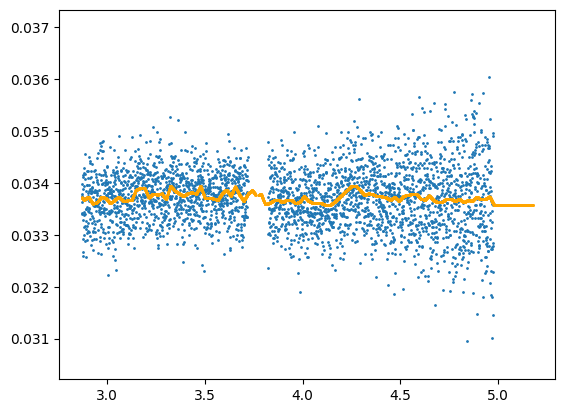

3462
3462
3462
3462


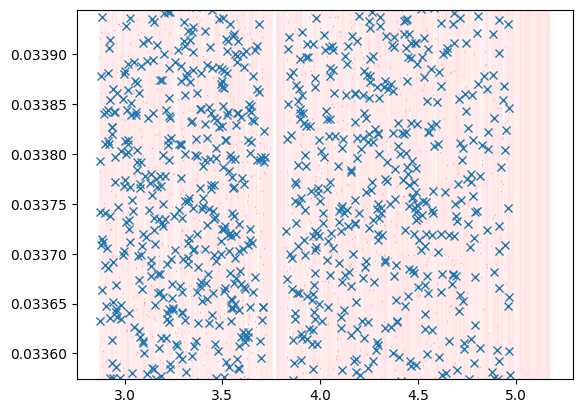

In [59]:
#print(result)
inst_name  = list(result.keys())[2]
data = result[inst_name]
#data2 = data['1d']

print('Result keys:', list(result.keys())[2])
print('Data keys:', list(data.keys()))
print('Wavelength (micron):', data['wave'])
print('Transit Depth (ppm):', data['spectrum']) 
print('Error Spectrum (ppm):', data['spectrum_w_rand'])
print('error wave floor?', data['error_w_floor'])

plt.scatter(data['wave'], data['spectrum_w_rand'], s=1)
plt.scatter(data['wave'], data['spectrum'], s=1, color='orange')
plt.ylim([min(data['spectrum'])*0.9, max(data['spectrum'])*1.1])
plt.show()
plt.errorbar(data['wave'], data['spectrum_w_rand'], yerr=(data['error_w_floor']), fmt='x', ecolor='r', capsize=0.1, elinewidth=0.01)
plt.ylim([min(data['spectrum']), max(data['spectrum'])])
print(len(data['wave']))
print(len(data['spectrum']))
print(len(data['spectrum_w_rand']))
print(len(np.abs(data['spectrum_w_rand'])))
#print(list(data2.keys()))

In [24]:
inst_name  = list(result.keys())[0]
data = result[inst_name]
data2 = list(data.keys())

print('Data2 keys:', data2)

Data2 keys: ['model_spec', 'model_wave', 'star_spec']


Loading BokehJS ...

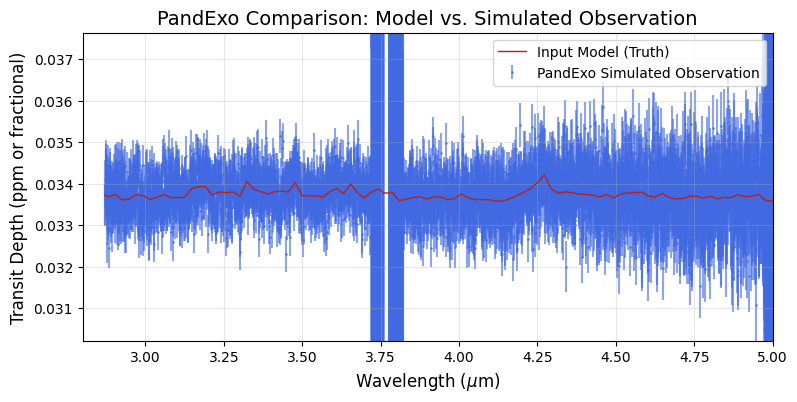

In [14]:
import pickle
import matplotlib.pyplot as plt
import pandexo.engine.justplotit as jpi

# 1. Load the PandExo output
with open('/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/JWST_result_TOI6438b.p', 'rb') as f:
    res = pickle.load(f)

# 2. Extract the plotting variables
# This is the "Final Spectrum" data
wave = res['FinalSpectrum']['wave']
observed_depth = res['FinalSpectrum']['spectrum_w_rand'] # Data + Noise
model_depth = res['FinalSpectrum']['spectrum']          # The smooth model
errors = res['FinalSpectrum']['error_w_floor']          # The 1-sigma uncertainties


# 3. Create the comparison plot
plt.figure(figsize=(8.9, 4))

# Plot the smooth "Truth" model
plt.plot(wave, model_depth, color='firebrick', label='Input Model (Truth)', lw=1, zorder=2)

#plt.errorbar(wave, model_depth, yerr=errors, fmt='s', color='darkorange', markersize=1, alpha=0.1, label='PandExo Model with Errors', zorder=3)

# Plot the "Simulated Observation" with error bars
plt.errorbar(wave, observed_depth, yerr=errors, fmt='o', color='royalblue', 
             markersize=1, alpha=0.6, label='PandExo Simulated Observation', zorder=1)

x, y, e = jpi.jwst_1d_spec(result, R = 0
                        , model=True, title='PandExo Simulated Observation vs. Input Model', x_range=[2.8, 5.0])

# Formatting for publication-quality looks
plt.ylim([min(model_depth)*0.9, max(model_depth)*1.1])
plt.xlabel('Wavelength ($\mu$m)', fontsize=12)
plt.ylabel('Transit Depth (ppm or fractional)', fontsize=12)
plt.title('PandExo Comparison: Model vs. Simulated Observation', fontsize=14)
plt.xlim(2.8,5)
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)

plt.show()

102 102 102


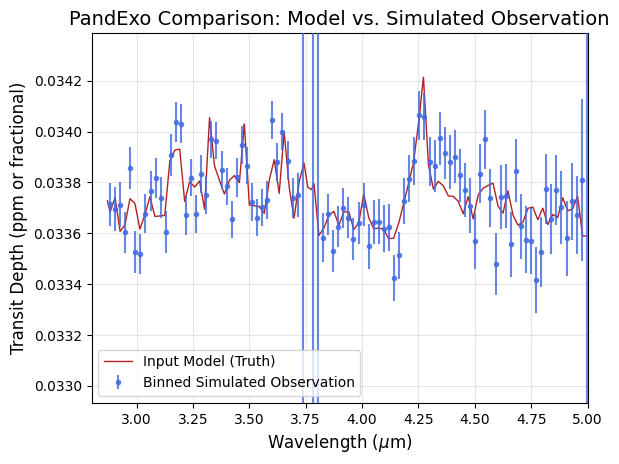

In [ ]:
import numpy as np

def bin_spectrum(wave, flux, error, bin_width=0.0225):
    """
    Bins spectrum using weighted averaging.
    bin_width is in the same units as wave (microns).
    """
    # Create the bins
    bins = np.arange(min(wave), max(wave), bin_width)
    
    binned_wave = []
    binned_flux = []
    binned_err = []

    for i in range(len(bins) - 1):
        # Find indices of points that fall into this bin
        indices = np.where((wave >= bins[i]) & (wave < bins[i+1]))[0]
        
        if len(indices) > 0:
            w = wave[indices]
            f = flux[indices]
            e = error[indices]
            
            # 1. Calculate Weights (1/sigma^2)
            weights = 1.0 / (e**2)
            
            # 2. Weighted Average for Flux
            weighted_f = np.sum(f * weights) / np.sum(weights)
            
            # 3. Propagated Error for the bin
            # The formula is: 1 / sqrt(sum(1/sigma^2))
            propagated_e = np.sqrt(1.0 / np.sum(weights))
            
            binned_wave.append(np.mean(w))
            binned_flux.append(weighted_f)
            binned_err.append(propagated_e)
            
    return np.array(binned_wave), np.array(binned_flux), np.array(binned_err)

# --- Apply it to your data ---
# Let's say you want bins of 0.1 microns
b_wave, b_obs, b_err = bin_spectrum(wave, observed_depth, errors)
print(len(b_wave), len(b_obs), len(b_err))
plt.errorbar(b_wave, b_obs, yerr=b_err, fmt='o', color='royalblue', 
             markersize=3, alpha=0.8, label='Binned Simulated Observation', zorder=4)
plt.plot(wave, model_depth, color='firebrick', label='Input Model (Truth)', lw=1, zorder=2)

plt.ylim(baseline*0.985, peak_val*1.005)
plt.xlabel('Wavelength ($\mu$m)', fontsize=12)
plt.ylabel('Transit Depth (ppm or fractional)', fontsize=12)
plt.title('PandExo Comparison: Model vs. Simulated Observation', fontsize=14)
plt.xlim(2.8,5)
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)

Loading BokehJS ...

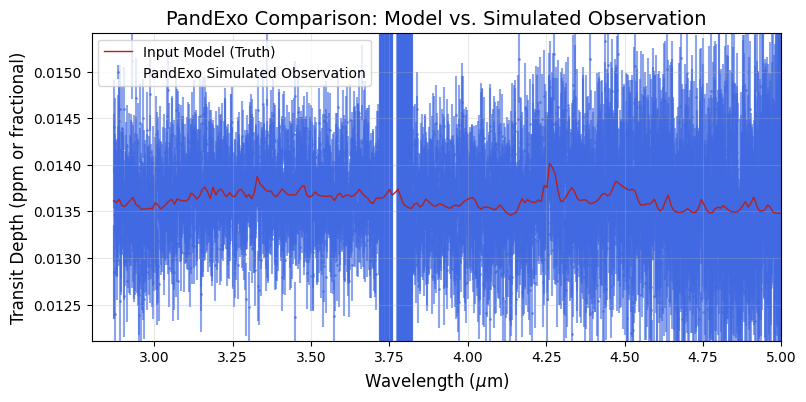

102 102 102


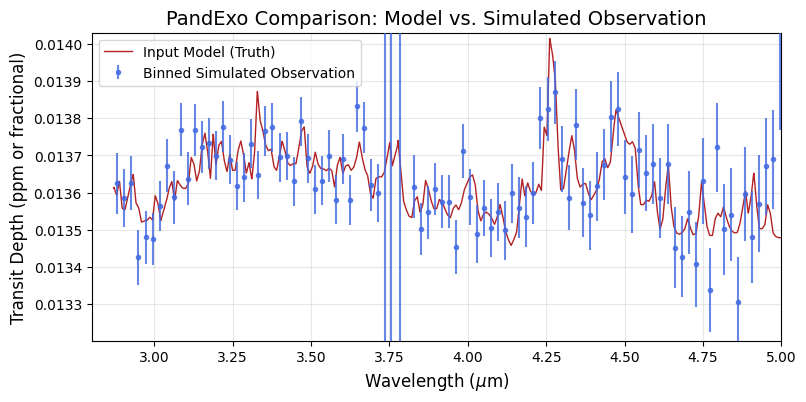

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandexo.engine.justplotit as jpi
loaded_spec = np.loadtxt(f'/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/planet_spectrum_GJ1214b.txt')
lam_data = loaded_spec[:, 0]
depth_data = loaded_spec[:, 1]

	# 2. Find Left Trough (2.5-3.0 um)
left_mask = (lam_data >= 4.0) & (lam_data <= 4.3)
left_val = np.min(depth_data[left_mask])
left_lam_target = lam_data[left_mask][np.argmin(depth_data[left_mask])]

	# 3. Find Right Trough (3.6-4.2 um)
right_mask = (lam_data >= 4.6) & (lam_data <= 4.8)
right_val = np.min(depth_data[right_mask])
right_lam_target = lam_data[right_mask][np.argmin(depth_data[right_mask])]

	# 4. Identify the Peak region between those two troughs
peak_mask = (lam_data >= left_lam_target) & (lam_data <= right_lam_target)
peak_region_depths = depth_data[peak_mask]

	# 5. Calculate Height and the Scatter Error
peak_val = np.max(peak_region_depths)
baseline = (left_val + right_val) / 2
# 1. Load the PandExo output
with open('/Users/sahil/Group-Studies---Exoplanets/Notebooks/test plots/JWST_result_GJ1214b.p', 'rb') as f:
    res = pickle.load(f)

# 2. Extract the plotting variables
# This is the "Final Spectrum" data
wave = res['FinalSpectrum']['wave']
observed_depth = res['FinalSpectrum']['spectrum_w_rand'] # Data + Noise
model_depth = res['FinalSpectrum']['spectrum']          # The smooth model
errors = res['FinalSpectrum']['error_w_floor']          # The 1-sigma uncertainties


# 3. Create the comparison plot
plt.figure(figsize=(8.9, 4))

# Plot the smooth "Truth" model
plt.plot(wave, model_depth, color='firebrick', label='Input Model (Truth)', lw=1, zorder=2)

#plt.errorbar(wave, model_depth, yerr=errors, fmt='s', color='darkorange', markersize=1, alpha=0.1, label='PandExo Model with Errors', zorder=3)

# Plot the "Simulated Observation" with error bars
plt.errorbar(wave, observed_depth, yerr=errors, fmt='o', color='royalblue', 
             markersize=1, alpha=0.6, label='PandExo Simulated Observation', zorder=1)

x, y, e = jpi.jwst_1d_spec(result, R = 0
                        , model=True, title='PandExo Simulated Observation vs. Input Model', x_range=[2.8, 5.0])

# Formatting for publication-quality looks
plt.ylim([min(model_depth)*0.9, max(model_depth)*1.1])
plt.xlabel('Wavelength ($\mu$m)', fontsize=12)
plt.ylabel('Transit Depth (ppm or fractional)', fontsize=12)
plt.title('PandExo Comparison: Model vs. Simulated Observation', fontsize=14)
plt.xlim(2.8,5)
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)

plt.show()

import numpy as np

def bin_spectrum(wave, flux, error, bin_width=0.0225):
    """
    Bins spectrum using weighted averaging.
    bin_width is in the same units as wave (microns).
    """
    # Create the bins
    bins = np.arange(min(wave), max(wave), bin_width)
    
    binned_wave = []
    binned_flux = []
    binned_err = []

    for i in range(len(bins) - 1):
        # Find indices of points that fall into this bin
        indices = np.where((wave >= bins[i]) & (wave < bins[i+1]))[0]
        
        if len(indices) > 0:
            w = wave[indices]
            f = flux[indices]
            e = error[indices]
            
            # 1. Calculate Weights (1/sigma^2)
            weights = 1.0 / (e**2)
            
            # 2. Weighted Average for Flux
            weighted_f = np.sum(f * weights) / np.sum(weights)
            
            # 3. Propagated Error for the bin
            # The formula is: 1 / sqrt(sum(1/sigma^2))
            propagated_e = np.sqrt(1.0 / np.sum(weights))
            
            binned_wave.append(np.mean(w))
            binned_flux.append(weighted_f)
            binned_err.append(propagated_e)
            
    return np.array(binned_wave), np.array(binned_flux), np.array(binned_err)

# --- Apply it to your data ---
# Let's say you want bins of 0.1 microns

plt.figure(figsize=(8.9, 4))
b_wave, b_obs, b_err = bin_spectrum(wave, observed_depth, errors)

plt.errorbar(b_wave, b_obs, yerr=b_err, fmt='o', color='royalblue', 
             markersize=3, alpha=0.8, label='Binned Simulated Observation', zorder=4)
plt.plot(wave, model_depth, color='firebrick', label='Input Model (Truth)', lw=1, zorder=2)

plt.ylim(baseline*0.98, peak_val*1.001)
plt.xlabel('Wavelength ($\mu$m)', fontsize=12)
plt.ylabel('Transit Depth (ppm or fractional)', fontsize=12)
plt.title('PandExo Comparison: Model vs. Simulated Observation', fontsize=14)
plt.xlim(2.8,5)
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
